After 1000 iteration, b: 0.0889365199374, m: 1.47774408519, loss: 112.614810116


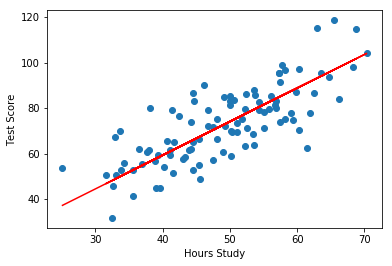

In [1]:
from numpy import *
import matplotlib.pyplot as plt

points = genfromtxt("data.csv", delimiter=",")

b = 0        
m = 0          
n = len(points)

learning_rate = 0.0001

iteration = 1000

# Put everything into vector - (matrix)
x = array(points[:,0])
y = array(points[:,1])

for i in range(iteration):
    b_gradient = 0
    m_gradient = 0
    
    # Gradient descent
    b_gradient = sum((-2/n) * (y - (m*x + b)))
    m_gradient = sum((-2/n) * (y - (m*x + b))*x)
    
    # Update b & m
    b = b - (learning_rate * b_gradient)
    m = m - (learning_rate * m_gradient)
    

    
loss = (1/n) * sum((y - (m*x + b))**2)

print ("After 1000 iteration, b: %s, m: %s, loss: %s" % (b,m,loss))

y_predict = m*x + b

plt.scatter(x,y)
plt.plot(x,y_predict, c='r')
plt.xlabel('Hours Study')
plt.ylabel('Test Score')
plt.show()

In [3]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

if __name__ == '__main__':
    run()


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473
